# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# # Define a transform to normalize the data
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize((0.5,), (0.5,))])
# # Download and load the training data
# trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
#
# # Download and load the test data
# testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# put data in loader in order to iterate, shuffle etc...
from torch.utils.data import DataLoader

trainloader = DataLoader(training_data, batch_size=32, shuffle=True)
testloader = DataLoader(test_data, batch_size=32, shuffle=True)


Here we can see one of the images.

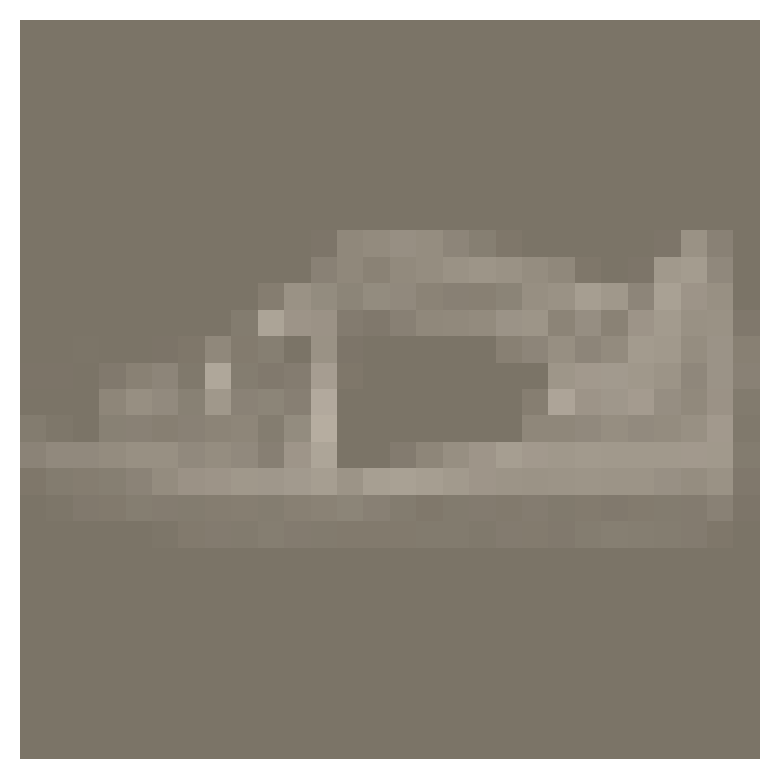

In [41]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [21]:
images, labels = next(iter(training_data))
print(images.squeeze().shape)
print(f"classes = {len(training_data.classes)}")




28
classes = 10


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [96]:
# TODO: Define your network architecture here
import torch.nn as nn
images, labels = next(iter(training_data))

features_dim = images.squeeze().shape[0]*images.squeeze().shape[1]
fully_connected_dims = [128, 64]
output_dim = len(training_data.classes)

class FashionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(features_dim, fully_connected_dims[0])
        self.fc2 = nn.Linear(fully_connected_dims[0], fully_connected_dims[1])
        self.fc3 = nn.Linear(fully_connected_dims[1], output_dim)

        self.relu = nn.ReLU()
        self.logSoftMax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # making sure the tensor is flattened
        x = x.view(x.shape[0],-1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.logSoftMax(x)

        return x

model = FashionNN()
model

FashionNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (logSoftMax): LogSoftmax(dim=1)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [98]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()

# define optimizer
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [100]:
# TODO: Train the network here

epochs = 5

for e in range(0,epochs):
    running_train_loss=0
    running_test_loss=0

    for images, labels in trainloader:

        optimizer.zero_grad()

        output = model.forward(images)

        # calculate loss
        loss = criterion(output, labels)

        # calculate backward prop gradients
        loss.backward()

        # take train step
        optimizer.step()

        running_train_loss += loss.item()

    for images, labels in testloader:
        output = model.forward(images)
        loss = criterion(output, labels)
        running_test_loss += loss.item()

    print(f"epoch {e} has loss on train {running_train_loss/len(trainloader)}")
    print(f"epoch {e} has loss on test {running_test_loss/len(testloader)}")


epoch 0 has loss on train 1.9185040102640787
epoch 0 has loss on test 1.6179393366122017
epoch 1 has loss on train 1.3735067217826844
epoch 1 has loss on test 1.1952076285791855
epoch 2 has loss on train 1.0753079154014586
epoch 2 has loss on test 0.9949200370441229
epoch 3 has loss on train 0.9198557842890421
epoch 3 has loss on test 0.8795954503190403
epoch 4 has loss on train 0.8275741669019063
epoch 4 has loss on test 0.8078011753269658


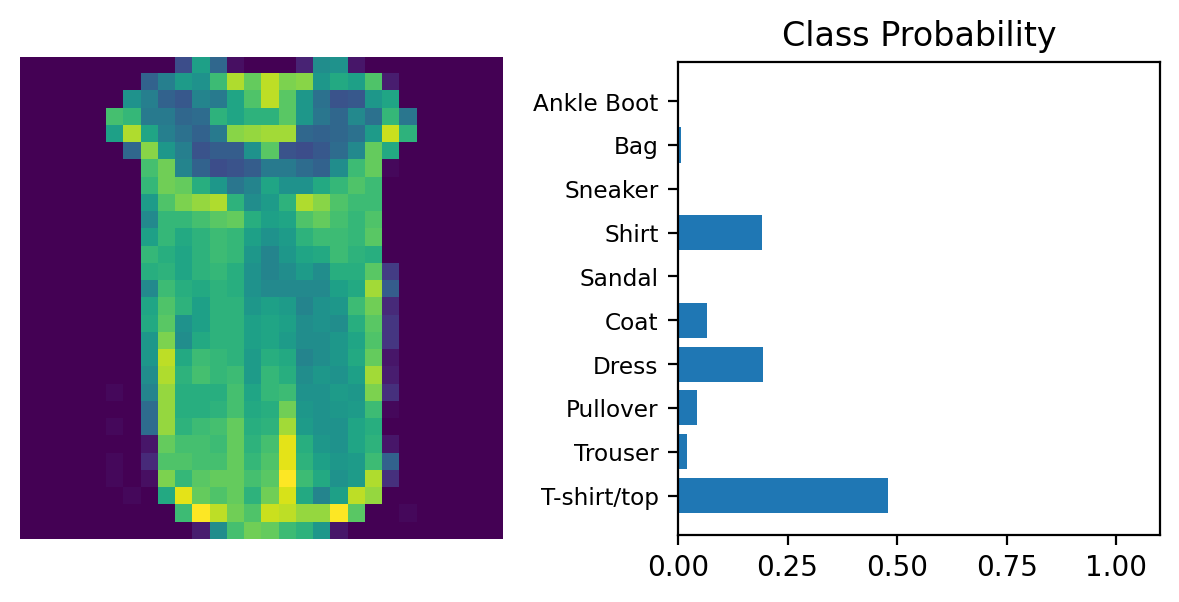

In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model.forward(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')